## Task : 2 Perform sentiment analysis on a given dataset, Visualize the task to get better overall understanding of people’s opinion.

### Import essential libraries to exploring data (pandas & numpy)

In [72]:
import numpy as np
import pandas as pd

In [73]:
from google.colab import files

uploaded=files.upload()


Saving dataset-2.csv to dataset-2 (2).csv


### Load the dataset


In [74]:
df=pd.read_csv('dataset-2.csv')
df.head()
#Let's the first five rows from the top 

,restaurant name,review,rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5


In [75]:
df.tail()
#Let's the first five rows from the bottom

,restaurant name,review,rating
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4
9999,Chinese Pavilion,Checked in here to try some delicious chinese ...,3.5


Let's See the size of the dataset 


In [76]:
df.shape

(10000, 3)

It has 3 columns and 10,000 rows

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant name  10000 non-null  object
 1   review           9955 non-null   object
 2   rating           9962 non-null   object
dtypes: object(3)
memory usage: 234.5+ KB


All are the categorical data (object data type)

In [78]:
df.dtypes

restaurant name    object
review             object
rating             object
dtype: object

### Clean the Data

In [79]:
df.isnull().sum()

restaurant name     0
review             45
rating             38
dtype: int64

Both review and rating are most essential features in order to manipulate customer feedback or sentimental analysis, so we can not drop them.

The Review has **45** null values and the rating column consist of **38** null values
I am not going to drop the rows which contains the null values. Each record is very important to getting better accuracy of the model.

I will **fill** the values in the **rating** column and the **review** column.

In [80]:
print(df['review'].isnull().mean())
print(df['rating'].isnull().mean())

0.0045
0.0038


Let's find out the **mode** of these categorical data

In [81]:
df['rating'].mode()

0    5
dtype: object

In [82]:
df['review'].mode()

0    good
dtype: object

Fill the mode values in empty spaces 

In [83]:
df['review'].fillna('good',inplace=True)

In [84]:
df['rating'].fillna('5',inplace=True)

In [85]:
df.isnull().sum()

restaurant name    0
review             0
rating             0
dtype: int64

In [86]:
df['review'].shape

(10000,)

Let's **count** the values of ratings in order to 1 to 5

In [87]:
df['rating'].value_counts()

5       3870
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: rating, dtype: int64

## Data Visualization by plotting

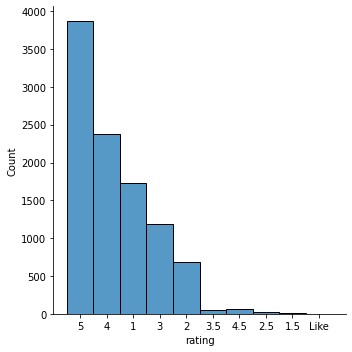

In [88]:
import seaborn as sns
sns.displot(df['rating'])

Maximum number of value count in **5 star** rating and least number of values 
indicates to **floating** numbers of ratings. It means most of the customers rated 5 star because they liked the service of the restaurant. Whereas least number of customers have given floting numbers. Furthermore, 1 star of customers are more than 2 and 3 star ratings

5 star rating will be called as **positve** reviews although 1 and 2 stars  will be called as **negative** reviews

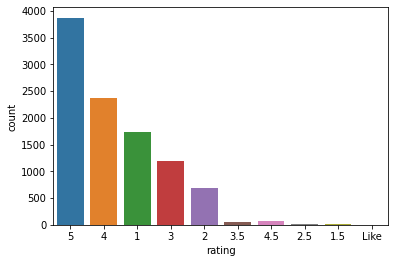

In [89]:
sns.countplot(x='rating',data=df)

Let's extract the specific review of the particular customer as we can say 150th customer

In [90]:
df['review'][150]

'Haleem is very very good and I am enjoying the food\nAnd nice place in paradise gachibowli\nAnd service is very good I like it\nNext time visit again'

We use **textblob** function to analyse the polarity and the subjectivity of sentiments of the reviews of the customers 


*   The value of polarity can be between the -1 to 1. 
*   The reviews with the Negative polarity values shows the negative sentiments  
*   The reviews with the positive polarity values  indicates the positive sentiments
*   Subjectivity value can be rise between 0 and 1
*   It quantify the amount of personal opinion and the actual information contain in that text
*   The higher the value of subjectivity contain the review of the personal opinion of that particular customer
*   The value nears to zero consist of the actual information of the review
not the personal opinion of the particular customer










In [91]:
from textblob import TextBlob
text_blob_object=TextBlob(df['review'][150])
print(text_blob_object.sentiment)

Sentiment(polarity=0.584, subjectivity=0.632)


This 150th review contain positive sentiments due to the positive value of polarity also personal opinion in review more than 50%.

Let's add an element in the dataset which sentiment polarity as I have mentioned before the positive polarity contains positive sentiments, negative polarity contains negative sentiments 

We will create **function**  where each review will contain their sentimental polarity at the end of table

In [92]:
def find_pol(review):
  return TextBlob(review).sentiment.polarity

df['Sentiment_Polarity']=df['review'].apply(find_pol)
df.head()


,restaurant name,review,rating,Sentiment_Polarity
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,0.660000
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,0.606667
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,0.540000
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,0.500000
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,0.577500


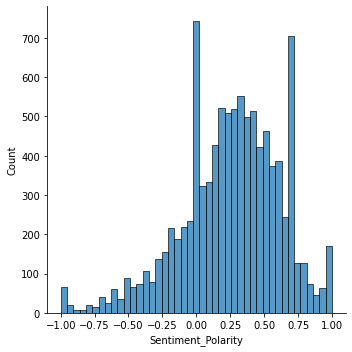

In [93]:
sns.displot(df['Sentiment_Polarity'])

This graph indicates that the highest number of customer reviewed neutral sentiment polarity then most of them contain positive sentiment and few contains negative sentiments

Let's analyze the relationship between ratings and sentiment polarities in graphical representation

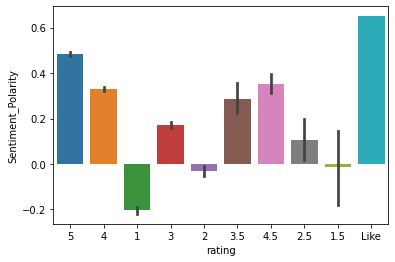

In [94]:
sns.barplot(x='rating',y='Sentiment_Polarity',data=df)

Like has maximum sentiment polarity then 5 star. The sentiment polarity has very diverse values according to their ratings. 1 has negative sentiments and they are decreasing monotonicaly 

Now, we are going to obtain the negative sentiments or negative reviews from our data. Analyse only top five records


In [111]:
most_negative= df[df.Sentiment_Polarity <0].review.head()
print(most_negative)


14    We ordered corn cheese balls, manchow soup and...
66    we went for a team lunch, such a worst restaur...
75    I have been at this place for dinner a few day...
80    Hostile staff, okeish food, not so great ambia...
83    Food quality and taste is not good. Super slow...
Name: review, dtype: object


These are most negative reviews or sentiments, we can say that it is having negative polarity. If the polarity is less than zero it is containing negative sentiments

In [112]:
df['review'][66]

'we went for a team lunch, such a worst restaurant.. food was tasteless, service was very slow and Ac was not working. We’ve requested them multiple times but its of no use. Please don’t waste your money and I strictly recommend not to prefer beyond flavours,'

Now, we are going to obtain the all most positive reviews or sentiments as they are having positve polarity. Analyse only top five records

In [114]:
most_positive=df[df.Sentiment_Polarity >0].review.head()
print(most_positive)

0    The ambience was good, food was quite good . h...
1    Ambience is too good for a pleasant evening. S...
2    A must try.. great food great ambience. Thnx f...
3    Soumen das and Arun was a great guy. Only beca...
4    Food is good.we ordered Kodi drumsticks and ba...
Name: review, dtype: object


If the polarity is greater than zero it is containing positive sentiments

In [115]:
df['review'][2]

'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.'

## Cleaning the texts

To build the prediction model we will first clean the text by using NLP libraries.

Frist, we will use only alphabets, then use lower case after it we will apply split on the text. Stopwords will remove the articles from the text then join them and store in corpus now this is cleaned data ready to use in machine learning algorithms




In [99]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,10000):
        review=re.sub('[^a-zA-Z]',' ',df['review'][i])
        review=review.lower()
        review=review.split()
        ps=PorterStemmer()
        review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
        review=' '.join(review)
        corpus.append(review)
review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'check tri delici chines food seen non veg luncheon tray menu an tri charg tax start manchow soup like instantli thereaft luncheon tray came pepper chicken starter kimchi salad wolli chicken egg fri rice egg hakka noodl tast fine like eat egg hakka noodl egg fri rice time badli miss dessert along tray dnt mind extra price valu money fine ambienc'

In [100]:
corpus

['ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen da realli courteou help',
 'ambienc good pleasant even servic prompt food good good experi soumen da kudo servic',
 'must tri great food great ambienc thnx servic pradeep subroto person recommend penn alfredo pasta also music background amaz',
 'soumen da arun great guy behavior sincereti good food cours would like visit place',
 'food good order kodi drumstick basket mutton biryani good thank pradeep serv well enjoy ambienc also good',
 'ambianc good servic good food apradeecp subro best servic food good papiya good hostess ur caption good star restaur',
 'nice place ambienc differ food order tasti servic also gud worth visit reason well realli must visit place',
 'well read mani review final visit place ambienc good come food crispi corn nice tawa fish ok basket biryani disappoint us biryani ok flatter claim staff polit prompt especi pradeep suman',
 'excel food 

## Count Vectorizing 




In [101]:
#Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()


print(X.shape)
print(X)



(10000, 10773)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [127]:
y=df["rating"].values
y

array(['5', '5', '5', ..., '1.5', '4', '3.5'], dtype=object)

In [103]:
y.shape

(10000,)

## Split Dataset

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## Build Different Models

In [129]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [130]:
# from sklearn.svm import SVC
# classifier=SVC()
# classifier.fit(X_train,y_train)

In [131]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier=KNeighborsClassifier(n_neighbors=5)
# classifier.fit(X_train,y_train)

In [132]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [133]:
# from sklearn.linear_model import LogisticRegression
# classifier=LogisticRegression()
# classifier.fit(X_train,y_train)

In [134]:
y_pred=classifier.predict(X_test)

In [135]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74       322
         1.5       0.00      0.00      0.00         3
           2       0.10      0.01      0.01       127
         2.5       0.00      0.00      0.00         4
           3       0.35      0.18      0.23       244
         3.5       0.00      0.00      0.00         7
           4       0.43      0.57      0.49       490
         4.5       0.00      0.00      0.00        18
           5       0.72      0.76      0.74       785

    accuracy                           0.59      2000
   macro avg       0.25      0.26      0.25      2000
weighted avg       0.55      0.59      0.56      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[262   0   7   1  16   1  25   0  10]
 [  1   0   0   0   0   0   2   0   0]
 [ 56   0   1   0  24   0  34   0  12]
 [  1   0   0   0   2   0   1   0   0]
 [ 34   0   2   0  43   0 133   0  32]
 [  0   0   0   0   2   0   5   0   0]
 [ 17   0   0   0  30   0 280   0 163]
 [  0   0   0   0   1   0   6   0  11]
 [ 12   0   0   0   4   0 169   0 600]]


In [137]:
print(metrics.accuracy_score(y_test,y_pred))

0.593


##**Accuracy of the different models** 

*   MultinomiaNB= 59%
*   KNeighborsClassifier=49%
*   LogisticRegression=58%
*   GaussianNB=25%
*   SVC=59%





